In [1]:
import pandas as pd 

# Data Gathering

In [2]:
df=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [3]:
df.shape

(8807, 12)

# Data Assessment

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data Preprocessing

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [9]:
# Fill missing values in 'director', 'cast', 'country' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [10]:
# Fill missing values in 'rating' with 'Not Rated'
df['rating'] = df['rating'].fillna('Not Rated')

In [11]:
# Fill missing values in 'duration' with 'Unknown'
df['duration'] = df['duration'].fillna('Unknown')

In [12]:
df = df.dropna(subset=['date_added'])

In [13]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# Exploratory Data Analysis (EDA)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

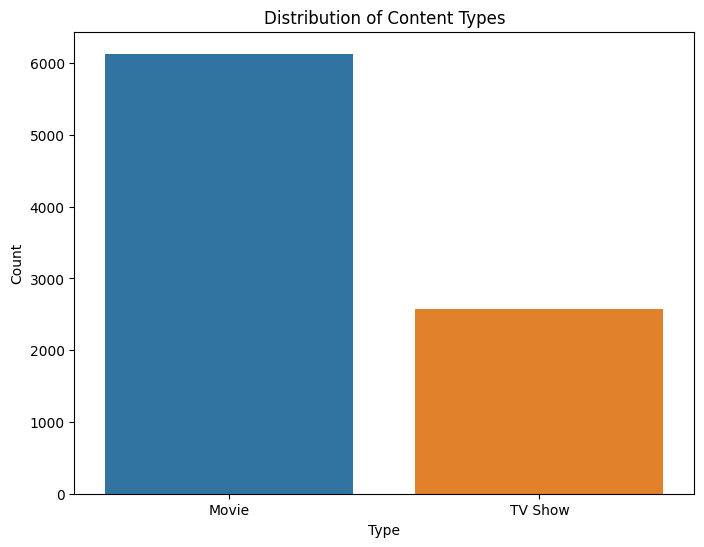

In [15]:
# Distribution of content types (Movies vs TV Shows)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**Here you can see most content distribute is movies**

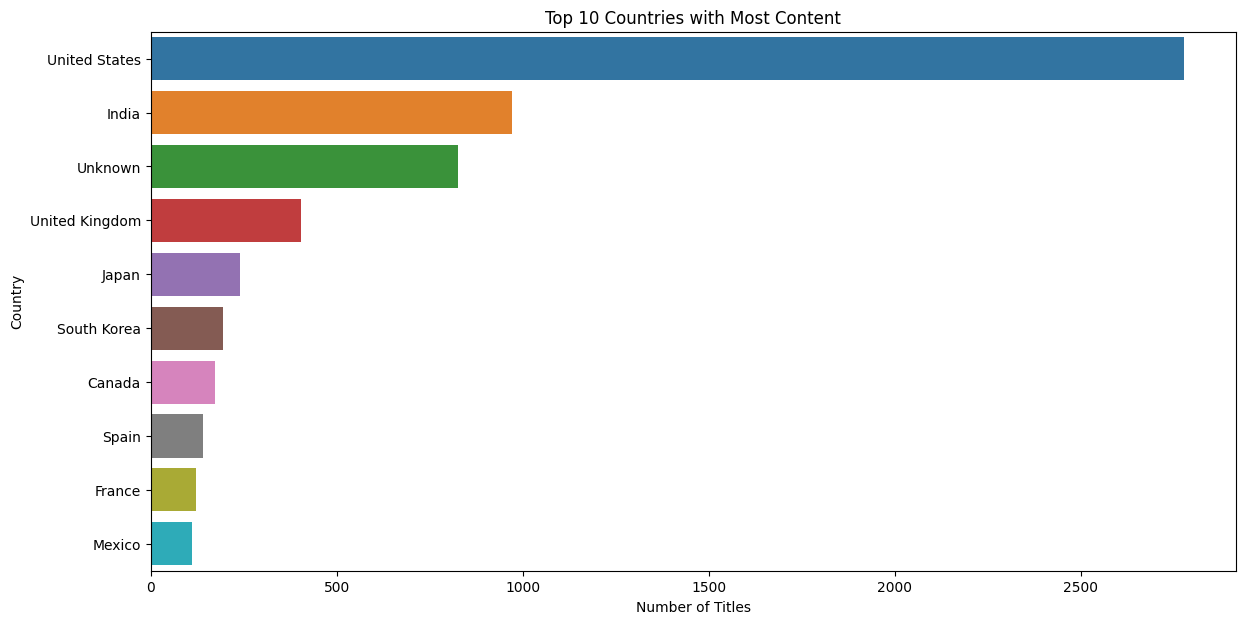

In [16]:
# Top 10 countries with most content
plt.figure(figsize=(14, 7))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**mostly distributed on usa**

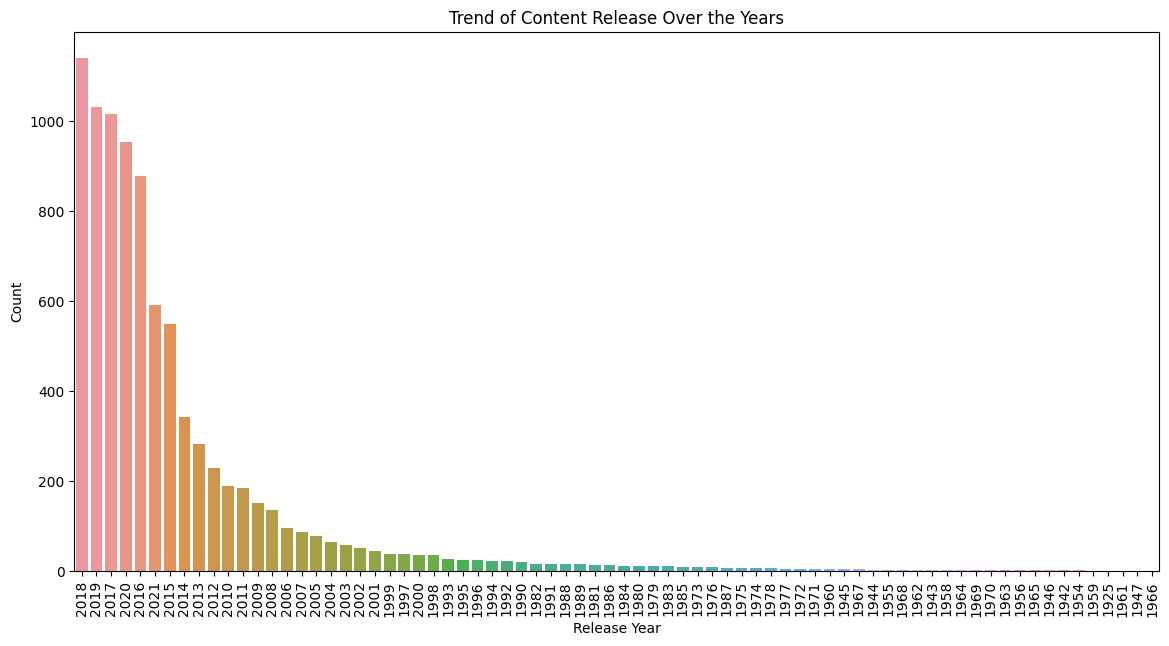

In [17]:
# Trend of content release over the years
plt.figure(figsize=(14, 7))
sns.countplot(x='release_year', data=df, order=df['release_year'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Trend of Content Release Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

**Most content release in 2018**

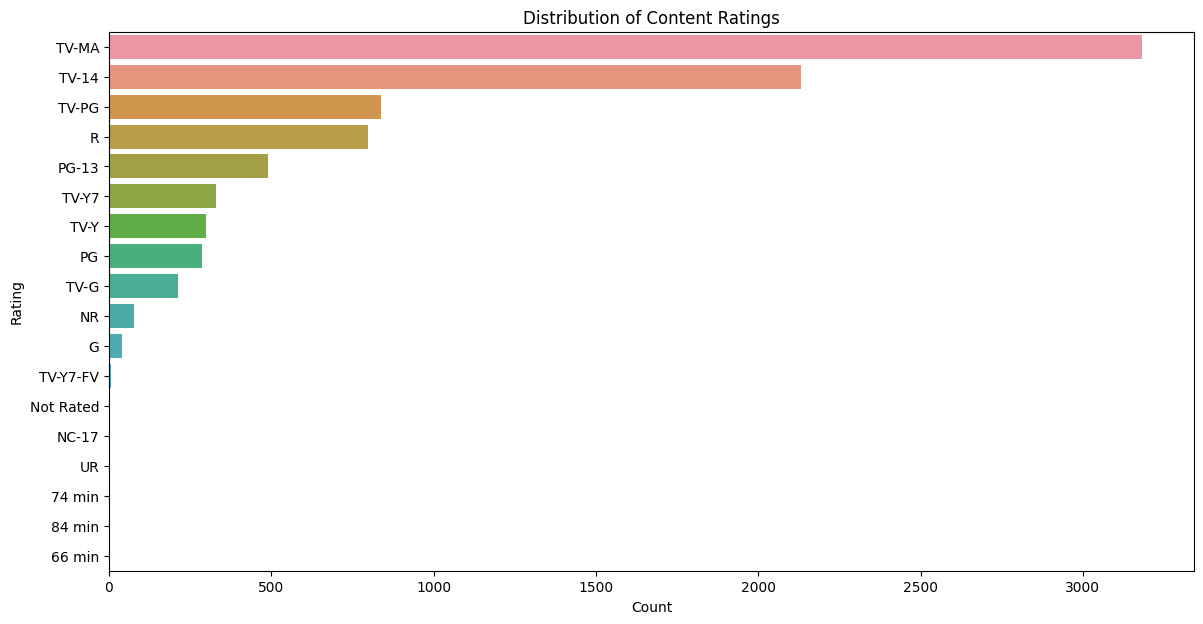

In [18]:
# Distribution of content ratings
plt.figure(figsize=(14, 7))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

**TV-MA gated highest ratings**

# Insights Extraction

In [19]:
#common directors
most_common_directors = df['director'].value_counts().head(10)
print('Most Common Directors:\n', most_common_directors)

Most Common Directors:
 director
Unknown                   2541
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


In [20]:
# Most frequent actors
most_frequent_actors = df['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
print('Most Frequent Actors:\n', most_frequent_actors)

Most Frequent Actors:
 Unknown             817
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Rupa Bhimani         31
Takahiro Sakurai     31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: count, dtype: int64


In [21]:
# Most common genres
most_common_genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
print('Most Common Genres:\n', most_common_genres)

Most Common Genres:
 International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1328
Documentaries                869
Action & Adventure           859
Independent Movies           756
TV Dramas                    739
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [22]:
# Number of titles added each year
titles_per_year = df['date_added'].dt.year.value_counts().sort_index()
print('Number of Titles Added Each Year:\n', titles_per_year)

Number of Titles Added Each Year:
 date_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      10
2014      23
2015      73
2016     418
2017    1164
2018    1625
2019    1999
2020    1878
2021    1498
Name: count, dtype: int64


In [23]:
# Number of titles by type and country
titles_by_type_country = df.groupby(['type', 'country']).size().unstack().fillna(0)
print('Number of Titles by Type and Country:\n', titles_by_type_country)

Number of Titles by Type and Country:
 country  , France, Algeria  , South Korea  Argentina  \
type                                                   
Movie                  1.0            0.0       38.0   
TV Show                0.0            1.0       18.0   

country  Argentina, Brazil, France, Poland, Germany, Denmark  \
type                                                           
Movie                                                  1.0     
TV Show                                                0.0     

country  Argentina, Chile  Argentina, Chile, Peru  Argentina, France  \
type                                                                   
Movie                 2.0                     1.0                1.0   
TV Show               0.0                     0.0                0.0   

country  Argentina, France, United States, Germany, Qatar  Argentina, Italy  \
type                                                                          
Movie                           

In [24]:
 titles_by_type_country

country,", France, Algeria",", South Korea",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
type,,,,,,,,,,,,,,,,,,,,,
Movie,1.0,0.0,38.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0
TV Show,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model development 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# Encoding categorical variables
label_encoders = {}
for column in ['type', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [27]:
# Extracting features and target variable
X = df[['director', 'cast', 'country', 'release_year', 'rating', 'duration', 'listed_in']]
y = df['type']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
#Model Training and Evaluation
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [31]:
print(f'Logistic Regression Accuracy: {accuracy_logreg}')
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8932261768082663
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1842
           1       0.82      0.81      0.82       771

    accuracy                           0.89      2613
   macro avg       0.87      0.87      0.87      2613
weighted avg       0.89      0.89      0.89      2613



In [32]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9318790662074244
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1842
           1       0.87      0.90      0.89       771

    accuracy                           0.93      2613
   macro avg       0.92      0.92      0.92      2613
weighted avg       0.93      0.93      0.93      2613



In [33]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9915805587447378
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1842
           1       1.00      0.98      0.99       771

    accuracy                           0.99      2613
   macro avg       0.99      0.99      0.99      2613
weighted avg       0.99      0.99      0.99      2613



# Model Selection

In [34]:
# Printing accuracies of all models
print(f'Logistic Regression Accuracy: {accuracy_logreg}')
print(f'SVM Accuracy: {accuracy_svm}')
print(f'Random Forest Accuracy: {accuracy_rf}')

Logistic Regression Accuracy: 0.8932261768082663
SVM Accuracy: 0.9318790662074244
Random Forest Accuracy: 0.9915805587447378


In [35]:
# Choose the best model
best_model = max((accuracy_logreg, 'Logistic Regression'), (accuracy_svm, 'SVM'), (accuracy_rf, 'Random Forest'))
print(f'Best Model: {best_model[1]} with accuracy {best_model[0]}')

Best Model: Random Forest with accuracy 0.9915805587447378


# Hyperparameter Tuning using Grid Search

**We'll start by using Grid Search to tune the hyperparameters of the Random Forest model, as it is likely to have more parameters that can be fine-tuned compared to Logistic Regression and SVM.**

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [38]:
#creating grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [39]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.0s
[CV] E

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [40]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best parameters for Random Forest: {best_params}')

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


# Cross-Validation
**Perform cross-validation to evaluate the model's performance more robustly**

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
# Used the best estimator from grid search
best_rf = grid_search.best_estimator_

In [43]:
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

In [44]:
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.99262295 0.99589828 0.99343724 0.99425759 0.99507793]
Average cross-validation score: 0.9942587985314487


# Model Interpretation
**Understand the importance of each feature in the Random Forest model**

In [45]:
import numpy as np

In [46]:
importances = best_rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

In [47]:
for i in range(len(features)):
    print(f'{features[indices[i]]}: {importances[indices[i]]}')

director: 0.41719018467760727
duration: 0.36543553076221746
listed_in: 0.1509778727531167
rating: 0.03102050474486809
country: 0.014126765611874757
release_year: 0.012039872234540193
cast: 0.00920926921577561


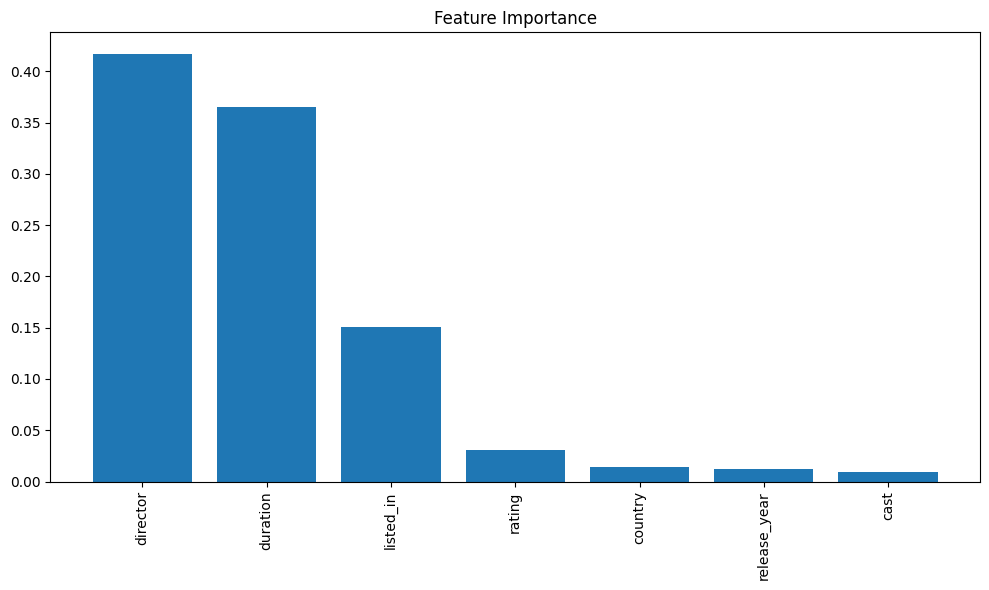

In [48]:
# Ploting feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Deployment part of the model 
**Saving the Model: Save the trained model using libraries like joblib or pickle.**

In [49]:
# import joblib
# #model saving
# joblib.dump(best_rf, 'best_rf_model.pkl')